## loss funciton

- references
    - https://docs.google.com/presentation/d/13Tylt2SvKvBL2hgILy5CmBtPDv3rXlVrQp01OzAe5Xo/edit#slide=id.p
    - https://pub.aimind.so/reinforcement-learning-meets-large-language-models-llms-aligning-human-preferences-in-llms-88c3a3f1a3f9

- triple $(x,y_w,y_l)$
    - $x$: prompt
    - $y_w$: winning completion
    - $y_\ell$: losing completion
    - $r_\theta(x,y_w)$: RM (reward models) score for the winning score
    - $r_\theta(x, y_\ell)$: RM (reward models) score for the losing score

$$
-\mathbb E_x\log(\sigma(r_\theta(x,y_w) - r_\theta(x, y_\ell)))
$$

Text(0.5, 0, '$d=r_\\theta(x,y_w)-r_\\theta(x, y_\\ell)$')

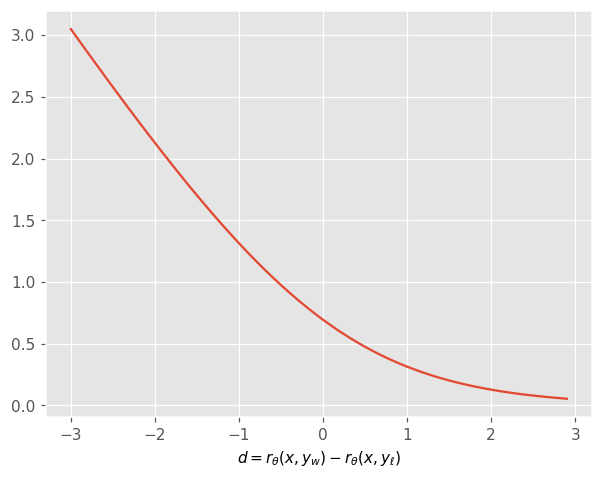

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.dpi"] = 110

def loss_fn(d):
    def sigma(d):
        return 1./(1+np.exp(-d))
    return -np.log(sigma(d))

x = np.arange(-3, 3, .1)
plt.plot(x, loss_fn(x))
plt.xlabel(r'$d=r_\theta(x,y_w)-r_\theta(x, y_\ell)$')

- 如何理解这幅图像呢
    - $d$ 越大，$\sigma(d)$ 越接近于1；
    - $\sigma(d)$ 越接近于1, $-\log(\sigma(d))$ 越接近于0
    - 反之，$d$ 越小，甚至是负值，$\sigma(d)$ 越接近于0, 则 $-\log(\sigma(d))$ 越接近于无穷大；